In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
# -*- coding: utf-8 -*-
"""
Description du Dataset Marketing Bancaire Portugais
---------------------------------------------------

Les données proviennent de campagnes de marketing direct menées par une banque portugaise, via appels téléphoniques.
Plusieurs contacts pouvaient être nécessaires pour déterminer si le client souscrirait à un dépôt à terme (variable cible `y` : oui/non).

Jeux de données disponibles :
----------------------------------------------------------------------
| Fichier                  | Nombre d’exemples | Variables | Particularités                                     |
|---------------------------|------------------|------------|---------------------------------------------------|
| bank-additional-full.csv  | 41 188           | 20         | Données complètes, ordonnées par date (mai 2008–nov 2010) |
| bank-additional.csv       | 4 119            | 20         | Échantillon 10% aléatoire de "bank-additional-full.csv"   |
| bank-full.csv             | 41 188           | 17         | Ancienne version, moins de variables, ordonnée par date   |
| bank.csv                  | 4 119            | 17         | Échantillon 10% aléatoire de "bank-full.csv"              |
----------------------------------------------------------------------

Objectif :
    Prédire si un client souscrira ('yes') ou non ('no') à un dépôt à terme.

Données incluses :
    - Informations démographiques (âge, métier, état civil, éducation)
    - Historique bancaire et crédit (prêts, défauts)
    - Données relatives aux campagnes (contact, résultat des contacts précédents)
    - Variables macroéconomiques (taux d’emploi, prix à la consommation)

Ce dataset est idéal pour l’apprentissage supervisé, notamment les modèles de classification
destinés à optimiser les campagnes marketing.
"""

# --- Importation des bibliothèques principales ---
import pandas as pd

# --- Chargement du jeu de données principal ---
# The original code was trying to load a CSV file which was not present.
# The data has already been fetched using ucimlrepo into X (features) and y (targets).
# We will combine X and y to create a single DataFrame 'data' for analysis.
# file_path = "bank-additional-full.csv"  # Original line
# data = pd.read_csv(file_path, sep=';')  # Original line

data = pd.concat([X, y], axis=1)

# --- Aperçu des données ---
print("Aperçu du dataset :\n")
print(data.head(), "\n")

print("Informations générales :\n")
print(data.info(), "\n")

print("Valeurs manquantes :\n")
print(data.isnull().sum(), "\n")

print("Répartition de la variable cible 'y' :\n")
print(data['y'].value_counts(normalize=True) * 100)

# --- Exemple d’analyse rapide ---
print("\nStatistiques descriptives (variables numériques) :\n")
print(data.describe())

# --- Exemple : Vérification du nombre d'exemples et de variables ---
n_samples, n_features = data.shape
print(f"\nNombre d’exemples : {n_samples}")
print(f"Nombre de variables : {n_features}")

# --- Exemple d'affichage d'informations sur les colonnes ---
print("\nListe des variables disponibles :\n")
print(list(data.columns))

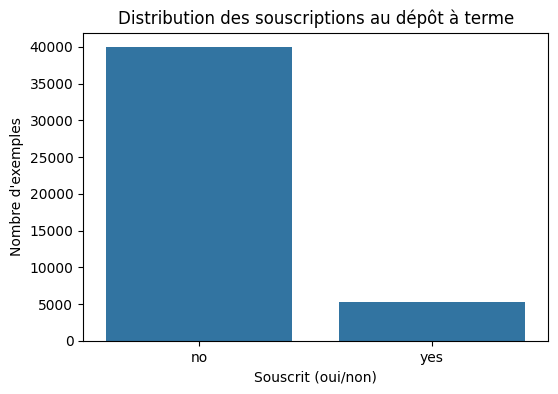

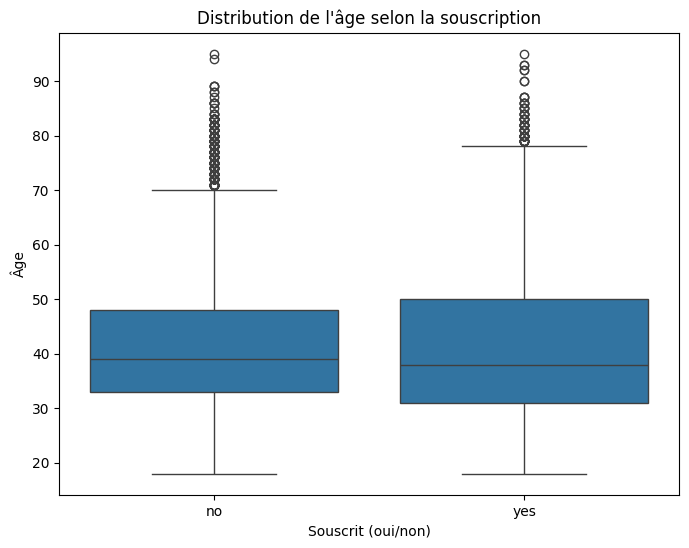

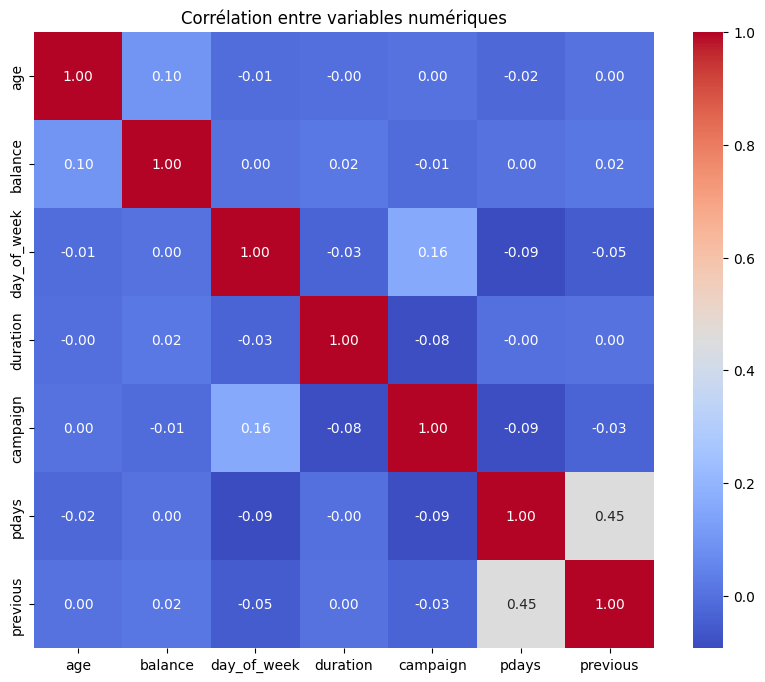

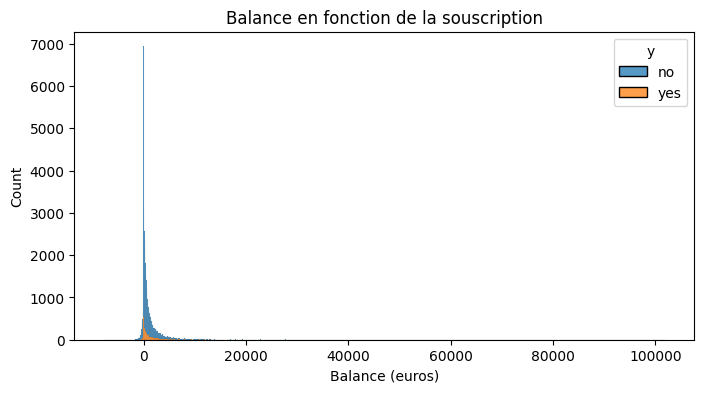

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# --- Re-fetch and prepare data for robustness within this cell's execution ---
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets
data = pd.concat([X, y], axis=1)
# --- End of data preparation ---

# Exemple de chargement des données (adapter le chemin selon votre fichier)
# df = pd.read_csv('chemin/vers/votre/dataset.csv')

# Exemple : visualisation de la distribution de la variable cible 'y'
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=data)
plt.title('Distribution des souscriptions au dépôt à terme')
plt.xlabel('Souscrit (oui/non)')
plt.ylabel('Nombre d\'exemples')
plt.show()

# Exemple : visualisation de l'âge en fonction de la souscription
plt.figure(figsize=(8,6))
sns.boxplot(x='y', y='age', data=data)
plt.title('Distribution de l\'âge selon la souscription')
plt.xlabel('Souscrit (oui/non)')
plt.ylabel('Âge')
plt.show()

# Exemple : heatmap de corrélation entre variables numériques
# For correlation, we need to select only numeric columns.
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Corrélation entre variables numériques')
plt.show()

# Exemple : histogramme d'une variable quantitative
plt.figure(figsize=(8,4))
sns.histplot(data=data, x='balance', hue='y', multiple='stack')
plt.title('Balance en fonction de la souscription')
plt.xlabel('Balance (euros)')
plt.ylabel('Count')
plt.show()